# Neural networks

A neural network is a computing model inspired by how the human brain works.
In simple terms, it’s a way for computers to learn patterns from data and make decisions or predictions

##### Where do we use neural networks? (Neural networks are used everywhere, especially where data is complex)
- Image & video :
[Face recognition,Medical imaging (X-rays, MRI analysis),Self-driving cars]

- Text & language :
[Chatbots, Translation (Google Translate),Speech recognition (Siri, Alexa)]

- Business & work :
[Sales forecasting, Fraud detection,Recommendation systems (Netflix, Amazon)]

- Science & engineering :
[Weather prediction, Drug discovery, Robotics and control systems ]

- Everyday apps :
[Spam email filtering, Credit scoring, Search engines ]


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load The Dataset

data = pd.read_csv('sonardataset.csv')
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# cheking missing Values
data.isnull().sum()

x_1     0
x_2     0
x_3     0
x_4     0
x_5     0
       ..
x_57    0
x_58    0
x_59    0
x_60    0
Y       0
Length: 61, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

In [6]:
# Deviding the features like Frequency Range & Target[M-mine, R-rock]

X = data.drop(columns=['Y'])
y = data['Y']

In [7]:
X.head(3)

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078


In [8]:
y.head

<bound method NDFrame.head of 0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: Y, Length: 208, dtype: object>

In [9]:
y.value_counts()

Y
M    111
R     97
Name: count, dtype: int64

In [10]:
#### Scaling, Encoding for Feature & Target Variables

from sklearn.preprocessing import LabelEncoder, StandardScaler

X_scaled = StandardScaler().fit_transform(X)
y_encod = LabelEncoder().fit_transform(y)

In [11]:
#### Train and test split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                   y_encod,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((166, 60), (42, 60), (166,), (42,))

#### ANN Model Implementation (Baseline Model)

- Dense(32)	Learns patterns from sonar signals
- ReLU	Prevents vanishing gradient
- Sigmoid	Binary classification output

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ANN_Model = Sequential()

# input  
ANN_Model.add(Dense(32, activation='relu', input_shape=(60,)))

# Hidden Layer
ANN_Model.add(Dense(16, activation='relu'))

#Output Layer
ANN_Model.add(Dense(1, activation='sigmoid'))

In [13]:
# Compile the Model
#Adam → adaptive learning
#Binary Cross-Entropy → best for 2-class problems
#Accuracy → performance metric

ANN_Model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [14]:
# Train the Model

history = ANN_Model.fit(X_train, y_train,
                       epochs=50,
                       batch_size=16,
                       validation_split=0.2,
                       verbose=0,
                       shuffle=False)

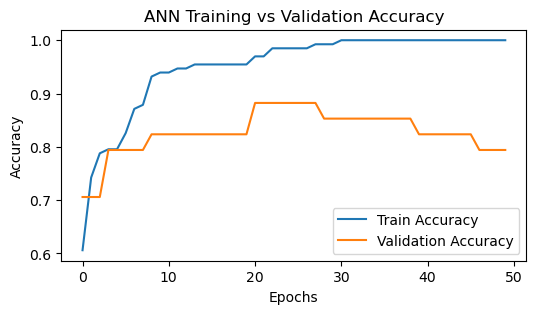

In [15]:
plt.figure(figsize=(6,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Training vs Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


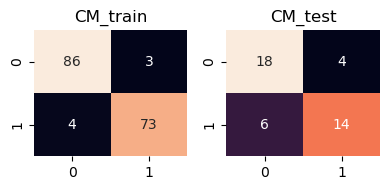

In [16]:
# Model Evaluation for Train & Test

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train = (ANN_Model.predict(X_train) > 0.5).astype(int)
y_pred_test = (ANN_Model.predict(X_test) > 0.5).astype(int)
CM_train = confusion_matrix(y_train, y_pred_train)
CM_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.title('CM_train')
sns.heatmap(CM_train, cbar=False, annot=True)

plt.subplot(1,2,2)
plt.title('CM_test')
sns.heatmap(CM_test, cbar=False, annot=True)

plt.tight_layout()
plt.show()



In [17]:
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print('='*50)

print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.9578313253012049
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        89
           1       0.96      0.95      0.95        77

    accuracy                           0.96       166
   macro avg       0.96      0.96      0.96       166
weighted avg       0.96      0.96      0.96       166

Test Accuracy: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.78      0.70      0.74        20

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42



- As per Result Model is Overfitting
Train accuracy ≈ 98%
Test accuracy ≈ 86%

### Hyperparameter Tuning
- Hyperparameters control learning behavior and significantly affect model performance.

In [18]:
tuned_model = Sequential()

tuned_model.add(Dense(64, activation='relu', input_shape=(60,)))
tuned_model.add(Dense(32, activation='relu'))
tuned_model.add(Dense(1, activation='sigmoid'))

In [19]:
from tensorflow.keras.optimizers import Adam

tuned_model.compile(optimizer=Adam(learning_rate=0.0005),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [20]:
history = tuned_model.fit(X_train, y_train,
               epochs=100,
               batch_size=16,
               validation_split=0.2,
               verbose=0,
               shuffle=False)

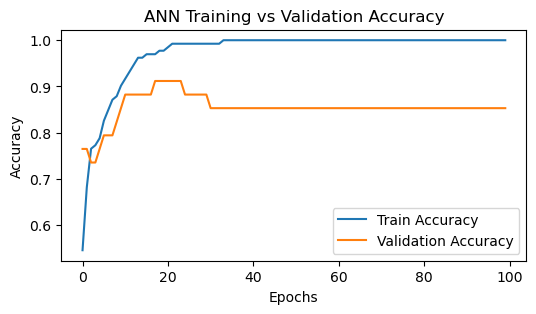

In [21]:
plt.figure(figsize=(6,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Training vs Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


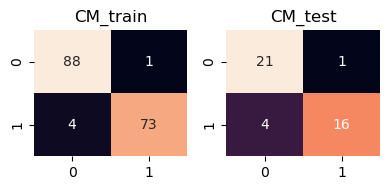

In [22]:
y_pred_train_tune = (tuned_model.predict(X_train) > 0.5).astype(int)
y_pred_test_tune = (tuned_model.predict(X_test) > 0.5).astype(int)
CM_train = confusion_matrix(y_train, y_pred_train_tune)
CM_test = confusion_matrix(y_test, y_pred_test_tune)

plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.title('CM_train')
sns.heatmap(CM_train, cbar=False, annot=True)

plt.subplot(1,2,2)
plt.title('CM_test')
sns.heatmap(CM_test, cbar=False, annot=True)

plt.tight_layout()
plt.show()


In [23]:
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_tune))
print(classification_report(y_train, y_pred_train_tune))
print('='*50)

print("Test Accuracy:", accuracy_score(y_test, y_pred_test_tune))
print(classification_report(y_test, y_pred_test_tune))

Train Accuracy: 0.9698795180722891
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.99      0.95      0.97        77

    accuracy                           0.97       166
   macro avg       0.97      0.97      0.97       166
weighted avg       0.97      0.97      0.97       166

Test Accuracy: 0.8809523809523809
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       0.94      0.80      0.86        20

    accuracy                           0.88        42
   macro avg       0.89      0.88      0.88        42
weighted avg       0.89      0.88      0.88        42



### Final Comparision

In [24]:
Comparision = pd.DataFrame({'Model':['ANN_Base','ANN_hyper_tune'],
                            'Train_Accuracy':[accuracy_score(y_train, y_pred_train),accuracy_score(y_train, y_pred_train_tune)],
                            'Test_Accuracy':[accuracy_score(y_test, y_pred_test),accuracy_score(y_test, y_pred_test_tune)]})
Comparision

,Model,Train_Accuracy,Test_Accuracy
0,ANN_Base,0.957831,0.761905
1,ANN_hyper_tune,0.969880,0.880952


### Conclusion:
- Comapred to base Model ANN_Hyper Achievd More Accuracy 0.88%
- Hyperparameter tuning best performance improvement
- making the ANN_hyper is the more efficient and suitable choice.

### Cross Validation

In [25]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train, test in kfold.split(X_scaled, y_encod):
    model = Sequential([
        Dense(32, activation='relu', input_dim=X.shape[1]),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')

    model.fit(X_train,y_train, epochs=50, batch_size=16, verbose=0)
    preds = (model.predict(X_test) > 0.5).astype(int)

    scores.append(accuracy_score(y_test, preds))

print("CV Accuracy:", scores)
print("Mean Accuracy:", np.mean(scores))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
CV Accuracy: [0.8333333333333334, 0.7857142857142857, 0.8095238095238095, 0.8809523809523809, 0.8809523809523809]
Mean Accuracy: 0.8380952380952381
